<class 'dict'>


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hanqi-Xiao\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,neg,neu,pos,compound
0,0.16,0.687,0.154,-0.3712


<class 'pandas.core.frame.DataFrame'>


,Date,Text,Word Cloud Text,Sentiment,Word Cloud Frequency,Word Count
0,2012-03-06,"March 6, 2012\n\nDear Diary,\n\nSorry I didn’t...","[March, 6, 2012, Dear, Diary, Sorry, I, get, w...",neg neu pos compound 0 0.16 0.687...,"{'March': 1, '6': 1, '2012': 1, 'Dear': 1, 'Di...",110


<class 'dict'>


,neg,neu,pos,compound
0,0.099,0.74,0.161,0.977


<class 'pandas.core.frame.DataFrame'>


,Date,Text,Word Cloud Text,Sentiment,Word Cloud Frequency,Word Count
0,2012-03-04,"March 4, 2012\n\nDear Diary,\n\nToday was a li...","[March, 4, 2012, Dear, Diary, Today, little, b...",neg neu pos compound 0 0.099 0.74...,"{'March': 1, '4': 1, '2012': 1, 'Dear': 1, 'Di...",204
0,2012-03-06,"March 6, 2012\n\nDear Diary,\n\nSorry I didn’t...","[March, 6, 2012, Dear, Diary, Sorry, I, get, w...",neg neu pos compound 0 0.16 0.687...,"{'March': 1, '6': 1, '2012': 1, 'Dear': 1, 'Di...",110


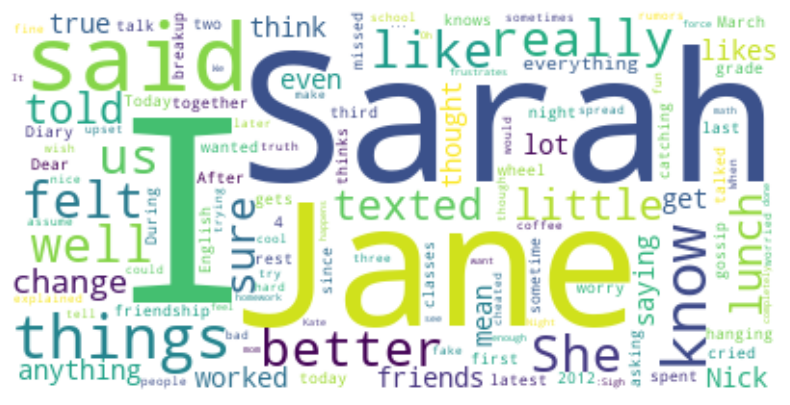

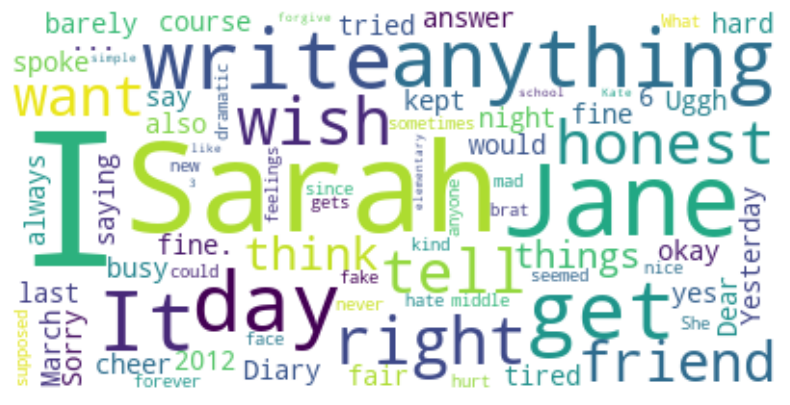

In [19]:
"""A NLP based Diary. Two"""
# Capturing settings.
import datetime
import pandas as pd
import numpy as np
from IPython.display import display
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from matplotlib import pyplot as plt
from textblob import Word
from get_txt import fetch
import string
import nltk
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('averaged_perceptron_tagger')
from transformers import pipeline


def filter_insignificant(chunk, tag_suffixes=['DT', 'CC']):
  good = []

  for word, tag in chunk:
    ok = True

    for suffix in tag_suffixes:
      if tag.endswith(suffix):
        ok = False
        break

    if ok:
      good.append((word, tag))

  return good


def word_frequencies(cloud_cleaned_entry: list[str]) -> dict[str, int]:
    freq_dict = dict()
    for word in cloud_cleaned_entry:
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1
    # print("\n".join([f"{word} : {freq}" for word, freq in freq_dict.items()]))
    return freq_dict


def word_cloud_clean(entry: str) -> str:
    """Clean every paragraph, stems all the words, puts into one list."""
    stemmer = PorterStemmer()
    eng_stops: list[str] = stopwords.words("english")
    entry = [i for i in word_tokenize(entry) if i not in eng_stops]
    entry = list(filter(lambda word: word not in string.punctuation+"’“”", entry))
    entry = [word for word, pos in filter_insignificant(pos_tag(entry))]
    # print(entry)
    # entry = [stemmer.stem(w) for w in entry]
    return entry


def sentiment_polarity(entry: str) -> float:
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(entry)
    sentiment = pd.json_normalize(sentiment)
    display(sentiment)
    print(type(sentiment))
    return sentiment


def emotion_polarity(entry: str) -> float:
    """Polarity determine."""
    classifier = pipeline("text-classification", model = "bhadresh-savani/distilbert-base-uncased-emotion")
    # classifier = pipeline("sentiment-analysis")
    predict = classifier(entry)
    print(predict)
    return predict


class MelanJournal():
    reminder_time: datetime
    new_user: bool = True
    data: pd.DataFrame


    def __init__(self):
        """Runs upon restarting the program."""
        if self.new_user == True:
            self.settings()
            self.new_user = False
            self.data = pd.DataFrame(columns = ["Date", "Text", "Word Cloud Text", "Sentiment", "Word Cloud Frequency", "Word Count"])


    def settings(self) -> None:
        """Sets or changes the settings."""
        # reminder_time = input("In the format HH:MM: ")
        reminder_time = "03:35"
        self.reminder_time = datetime.time(*map(int, reminder_time.split(':')))


    def turn_into_data_frame(self, data: dict[str, str]) -> None:
        """Convert into a dataframe."""
        print(type(data))
        word_cloud_text = word_cloud_clean(data["Text"])
        sentiment = sentiment_polarity(data["Text"])
        word_cloud_frequency = word_frequencies(word_cloud_text)
        word_count = len(word_cloud_text)
        data["Word Cloud Text"] = word_cloud_text
        data["Sentiment"] = sentiment
        data["Word Cloud Frequency"] = word_cloud_frequency
        data["Word Count"] = word_count

        self.data = pd.concat([pd.DataFrame([data]), self.data], sort = False)
        # # Calculate all variables.
        # self.data["Word Cloud Text"] = self.data["Text"].apply(word_cloud_clean)
        # # self.data["Emotions"] = self.data["Text"].apply(emotion_polarity)
        # self.data["Sentiment"] = self.data["Text"].apply(sentiment_polarity)
        # print(type(self.data["Sentiment"][0]))
        # self.data["Word Cloud Frequency"] = self.data["Word Cloud Text"].apply(word_frequencies)
        # self.data["Word Count"] = self.data["Word Cloud Text"].apply(lambda x: len(x))

        display(self.data)

    
    def wordcloud(self) -> None:
        for i, row in self.data.iterrows():
            frequencies = row["Word Cloud Frequency"]
            cloud = WordCloud(background_color="White")
            cloud.generate_from_frequencies(frequencies)
            plt.figure(figsize=(20,5), )
            plt.imshow(cloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()


    def plotmy_stuffies(self) -> None:
        """Deprecated"""
        sentiments = self.data["Sentiment"]
        print(type(sentiments))


    def sentiment_by_time(self) -> None:
        """Make a new column where a new column is added to the dataframe."""
        sentiments = self.data["Sentiment"]
        print(type(sentiments))
        


def main() -> None:
    journal = MelanJournal()
    journal.turn_into_data_frame(fetch("sample_3.txt"))
    journal.turn_into_data_frame(fetch("sample_2.txt"))
    journal.wordcloud()
    pass

main()